In [73]:
#https://facebook.github.io/prophet/docs/quick_start.html#python-api
#!pip install prophet
#!pip install plotly

In [74]:
# Python
import pandas as pd
from prophet import Prophet
from datetime import timedelta

In [75]:
import warnings
# Suppress specific FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [76]:
df = pd.read_csv('debt.csv')
df.columns = df.columns.str.strip()
df.head(10)

ds       y
0  31.12.1993  158800
1  31.12.1994  157300
2  31.12.1995  154400
3  31.12.1996  155200
4  31.12.1997  173141
5  31.12.1998  194676
6  31.12.1999  228356
7  31.12.2000  289324
8  31.12.2001  345045
9  31.12.2002  395898

In [77]:
df['ds'] = pd.to_datetime(df['ds'], format='%d.%m.%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      31 non-null     datetime64[ns]
 1   y       31 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 628.0 bytes


In [78]:
cumulative_results = []

for i in range(len(df) - 1):
    # Current and next date
    start_date = df.loc[i, 'ds']
    end_date = df.loc[i + 1, 'ds']
    
    # Current and next values
    start_value = df.loc[i, 'y']
    end_value = df.loc[i + 1, 'y']
    
    # Calculate the number of days between the current and next date
    days_between = (end_date - start_date).days
    
    # Calculate the daily change in value
    daily_change = (end_value - start_value) / days_between
    
    # Generate values for each day between the start and end date
    current_date = start_date
    current_value = start_value
    
    while current_date <= end_date:
        cumulative_results.append({'ds': current_date, 'y': current_value})
        
        # Increment date by 1 day
        current_date += timedelta(days=1)
        
        # Increment value by daily change
        current_value += daily_change

# Convert cumulative results to a DataFrame
cumulative_df = pd.DataFrame(cumulative_results)

# Display the cumulative DataFrame
print(cumulative_df)

              ds             y
0     1993-12-31  1.588000e+05
1     1994-01-01  1.587959e+05
2     1994-01-02  1.587918e+05
3     1994-01-03  1.587877e+05
4     1994-01-04  1.587836e+05
...          ...           ...
10982 2023-12-27  3.108532e+06
10983 2023-12-28  3.109124e+06
10984 2023-12-29  3.109716e+06
10985 2023-12-30  3.110308e+06
10986 2023-12-31  3.110900e+06

[10987 rows x 2 columns]


In [93]:
# Python
m = Prophet()
m = Prophet(interval_width=0.95)
m.fit(cumulative_df)

19:32:23 - cmdstanpy - INFO - Chain [1] start processing
19:32:25 - cmdstanpy - INFO - Chain [1] done processing


In [94]:
# Python
future = m.make_future_dataframe(periods=3*365)
future.tail()

ds
12048 2026-12-26
12049 2026-12-27
12050 2026-12-28
12051 2026-12-29
12052 2026-12-30

In [95]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
12048 2026-12-26  3.877538e+06  3.368034e+06  4.345246e+06
12049 2026-12-27  3.878310e+06  3.358561e+06  4.332584e+06
12050 2026-12-28  3.878717e+06  3.410829e+06  4.386622e+06
12051 2026-12-29  3.879163e+06  3.400071e+06  4.329408e+06
12052 2026-12-30  3.879943e+06  3.404328e+06  4.342565e+06

In [96]:
forecast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0     1993-12-31  1.571599e+05  1.992628e+04  3.015590e+05  1.571599e+05   
1     1994-01-01  1.571581e+05  1.922610e+04  2.978256e+05  1.571581e+05   
2     1994-01-02  1.571564e+05  1.734954e+04  2.907699e+05  1.571564e+05   
3     1994-01-03  1.571546e+05  2.675506e+04  2.811801e+05  1.571546e+05   
4     1994-01-04  1.571529e+05  2.653106e+04  2.816330e+05  1.571529e+05   
...          ...           ...           ...           ...           ...   
12048 2026-12-26  3.876751e+06  3.368034e+06  4.345246e+06  3.405471e+06   
12049 2026-12-27  3.877523e+06  3.358561e+06  4.332584e+06  3.405899e+06   
12050 2026-12-28  3.878295e+06  3.410829e+06  4.386622e+06  3.406327e+06   
12051 2026-12-29  3.879068e+06  3.400071e+06  4.329408e+06  3.406756e+06   
12052 2026-12-30  3.879840e+06  3.404328e+06  4.342565e+06  3.407184e+06   

        trend_upper  additive_terms  additive_terms_lower  \
0      1.571599e+05      -67.089853            -67.089853   
1      1.571581e+05     -161.095838           -161.095838   
2      1.571564e+05     -180.802252           -180.802252   
3      1.571546e+05     -554.425280           -554.425280   
4      1.571529e+05     -879.640040           -879.640040   
...             ...             ...                   ...   
12048  4.318410e+06      787.132341            787.132341   
12049  4.319850e+06      786.345855            786.345855   
12050  4.321289e+06      421.577359            421.577359   
12051  4.322729e+06       94.991539             94.991539   
12052  4.324168e+06      102.699502            102.699502   

       additive_terms_upper      weekly  weekly_lower  weekly_upper  \
0                -67.089853    8.024506      8.024506      8.024506   
1               -161.095838   72.890318     72.890318     72.890318   
2               -180.802252  210.773819    210.773819    210.773819   
3               -554.425280   -8.202336     -8.202336     -8.202336   
4               -879.640040 -183.316778   -183.316778   -183.316778   
...                     ...         ...           ...           ...   
12048            787.132341   72.890318     72.890318     72.890318   
12049            786.345855  210.773819    210.773819    210.773819   
12050            421.577359   -8.202336     -8.202336     -8.202336   
12051             94.991539 -183.316778   -183.316778   -183.316778   
12052            102.699502  -20.008480    -20.008480    -20.008480   

           yearly  yearly_lower  yearly_upper  multiplicative_terms  \
0      -75.114359    -75.114359    -75.114359                   0.0   
1     -233.986157   -233.986157   -233.986157                   0.0   
2     -391.576071   -391.576071   -391.576071                   0.0   
3     -546.222944   -546.222944   -546.222944                   0.0   
4     -696.323262   -696.323262   -696.323262                   0.0   
...           ...           ...           ...                   ...   
12048  714.242023    714.242023    714.242023                   0.0   
12049  575.572036    575.572036    575.572036                   0.0   
12050  429.779695    429.779695    429.779695                   0.0   
12051  278.308317    278.308317    278.308317                   0.0   
12052  122.707983    122.707983    122.707983                   0.0   

       multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                             0.0                         0.0  1.570928e+05  
1                             0.0                         0.0  1.569970e+05  
2                             0.0                         0.0  1.569756e+05  
3                             0.0                         0.0  1.566002e+05  
4                             0.0                         0.0  1.562732e+05  
...                           ...                         ...           ...  
12048                         0.0                         0.0  3.877538e+06  
12049                         0.0     

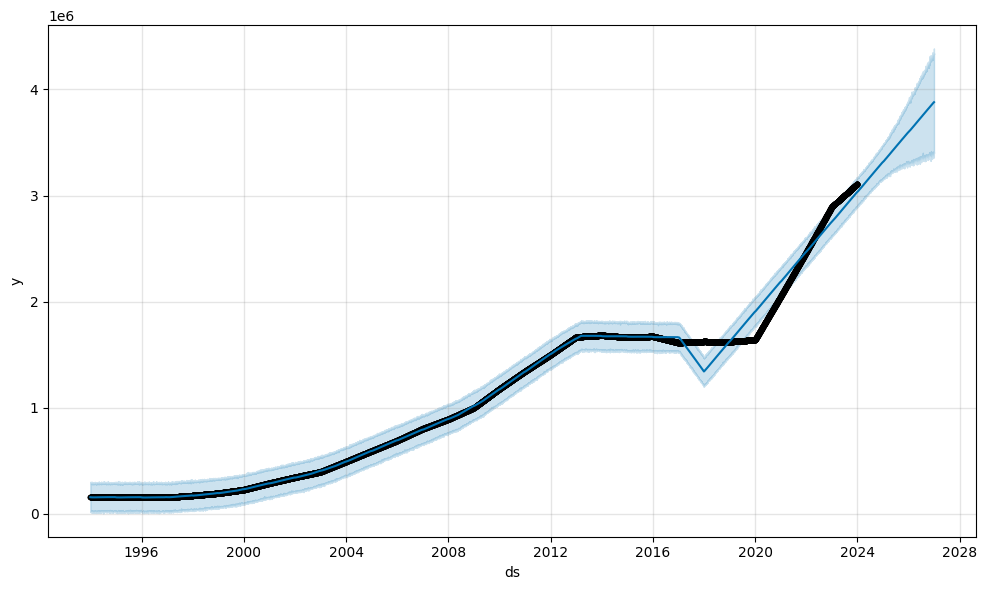

In [97]:
# Python
fig1 = m.plot(forecast)

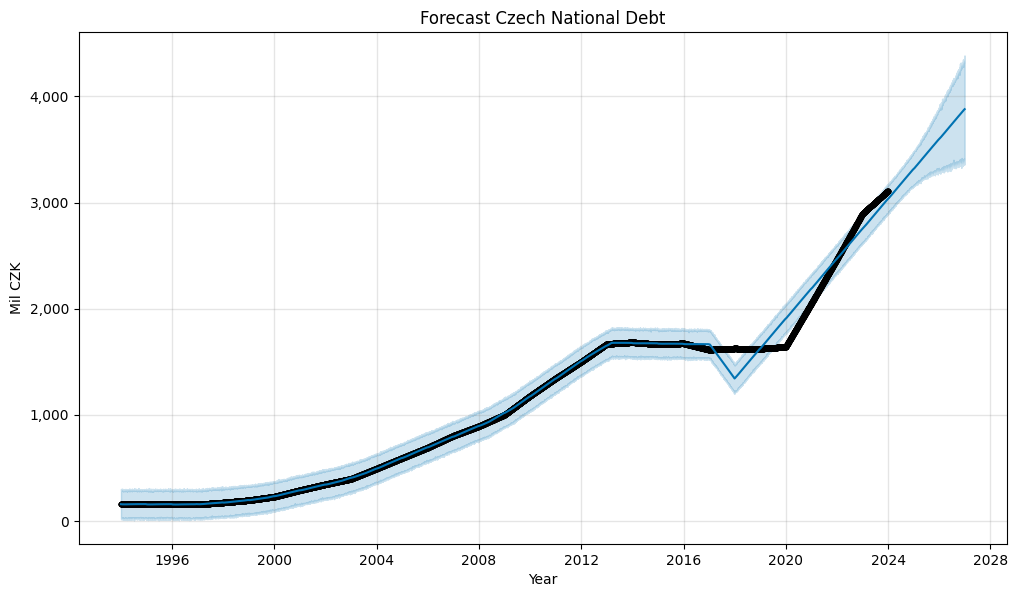

In [104]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
# Define the desired format (e.g., commas for thousands separator)
fig1 = m.plot(forecast)
def y_format(x, _):
    return f'{x*0.001:,.0f}'  # Format numbers with commas (e.g., 1000 -> 1,000)

# Apply the formatter to the y-axis
fig1.gca().yaxis.set_major_formatter(FuncFormatter(y_format))
# Add labels and title
plt.xlabel('Year')  # X-axis label
plt.ylabel('Mil CZK')  # Y-axis label
plt.title('Forecast Czech National Debt')  # Plot title
# Show the plot
plt.show()

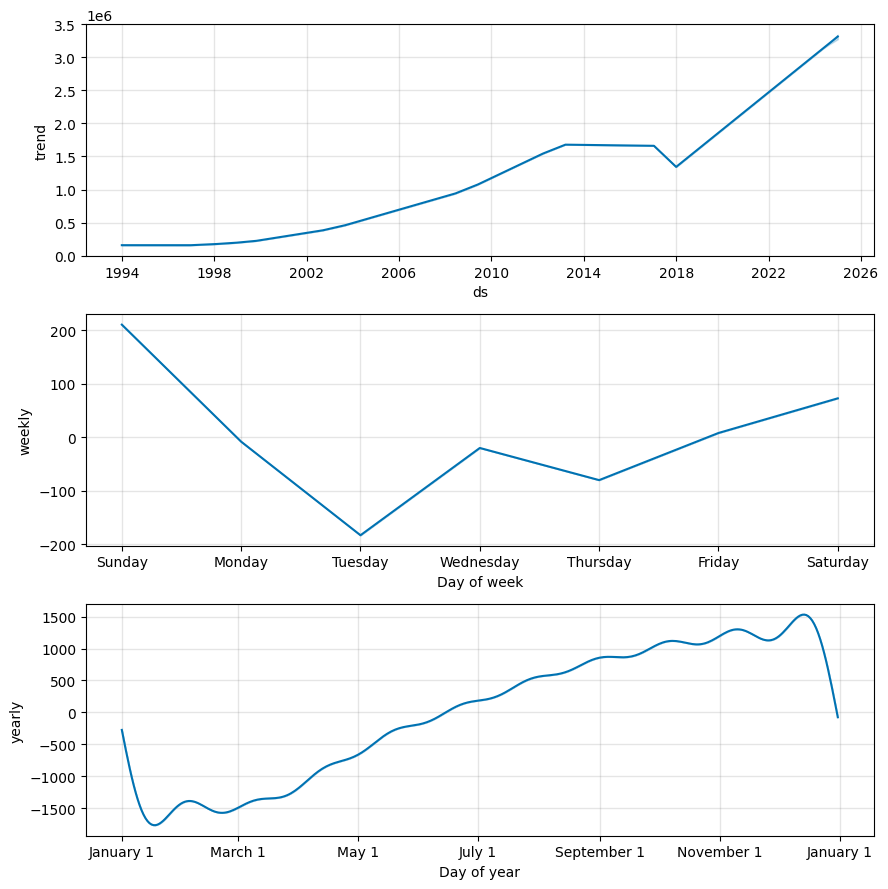

In [70]:
# Python - daily and weekly data is not available
fig2 = m.plot_components(forecast)

In [71]:
# Python
import plotly.graph_objects as go
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [72]:
# Python
#plot_components_plotly(m, forecast)
